# Long-term Investment in SPY

https://finance.yahoo.com/quote/SPY?p=SPY

If you have time, is good to invest in SPY for long-term investment.

## SPY Market

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from tabulate import tabulate
import math
from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'SPY'
start = '2007-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


Date
2007-01-03    108.999954
2007-01-04    109.231255
2007-01-05    108.360008
2007-01-08    108.861206
2007-01-09    108.768616
Name: Adj Close, dtype: float64

In [3]:
df.tail()

Date
2018-12-24    231.115768
2018-12-26    242.792862
2018-12-27    244.656876
2018-12-28    244.341248
2018-12-31    246.481415
Name: Adj Close, dtype: float64

In [4]:
df.min()

54.771

In [5]:
df.max()

286.5625

In [6]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
12 years


### Starting Cash with 100k to invest in Bonds

In [7]:
Cash = 100000

In [8]:
print('Number of Shares:')
shares = int(Cash/df.iloc[0])
print('{}: {}'.format(symbol, shares))

Number of Shares:
SPY: 917


In [9]:
print('Beginning Value:')
shares = int(Cash/df.iloc[0])
Begin_Value = round(shares * df.iloc[0], 2)
print('{}: ${}'.format(symbol, Begin_Value))

Beginning Value:
SPY: $99952.96


In [10]:
print('Current Value:')
shares = int(Cash/df.iloc[0])
Current_Value = round(shares * df.iloc[-1], 2)
print('{}: ${}'.format(symbol, Current_Value))

Current Value:
SPY: $226023.46


In [11]:
returns = df.pct_change().dropna()

In [12]:
returns.head()

Date
2007-01-04    0.002122
2007-01-05   -0.007976
2007-01-08    0.004625
2007-01-09   -0.000851
2007-01-10    0.003332
Name: Adj Close, dtype: float64

In [13]:
returns.tail()

Date
2018-12-24   -0.026423
2018-12-26    0.050525
2018-12-27    0.007677
2018-12-28   -0.001290
2018-12-31    0.008759
Name: Adj Close, dtype: float64

In [14]:
# Calculate cumulative returns
daily_cum_ret=(1+returns).cumprod()
print(daily_cum_ret.tail())

Date
2018-12-24    2.120329
2018-12-26    2.227458
2018-12-27    2.244559
2018-12-28    2.241664
2018-12-31    2.261298
Name: Adj Close, dtype: float64


In [15]:
# Print the mean
print("mean : ", returns.mean()*100)

# Print the standard deviation
print("Std. dev: ", returns.std()*100)

# Print the skewness
print("skew: ", returns.skew())

# Print the kurtosis
print("kurt: ", returns.kurtosis())

mean :  0.03476488888124157
Std. dev:  1.2442271708875539
skew:  0.1707408780838393
kurt:  15.03469087750591


In [16]:
# Calculate total return and annualized return from price data 
total_return = (returns[-1] - returns[0]) / returns[0]
print(total_return)

3.1276197303395583


In [17]:
# Annualize the total return over 12 year 
annualized_return = ((1+total_return)**(1/12))-1

In [18]:
# Calculate annualized volatility from the standard deviation
vol_port = returns.std() * np.sqrt(250)

In [19]:
# Calculate the Sharpe ratio 
rf = 0.001
sharpe_ratio = (annualized_return - rf) / vol_port
print(sharpe_ratio)

0.6323584442799886


In [20]:
# Create a downside return column with the negative returns only
target = 0
downside_returns = returns.loc[returns < target]

# Calculate expected return and std dev of downside
expected_return = returns.mean()
down_stdev = downside_returns.std()

# Calculate the sortino ratio
rf = 0.01
sortino_ratio = (expected_return - rf)/down_stdev

# Print the results
print("Expected return: ", expected_return*100)
print('-' * 50)
print("Downside risk:")
print(down_stdev*100)
print('-' * 50)
print("Sortino ratio:")
print(sortino_ratio)

Expected return:  0.03476488888124157
--------------------------------------------------
Downside risk:
1.0191400178162102
--------------------------------------------------
Sortino ratio:
-0.9471074575081863


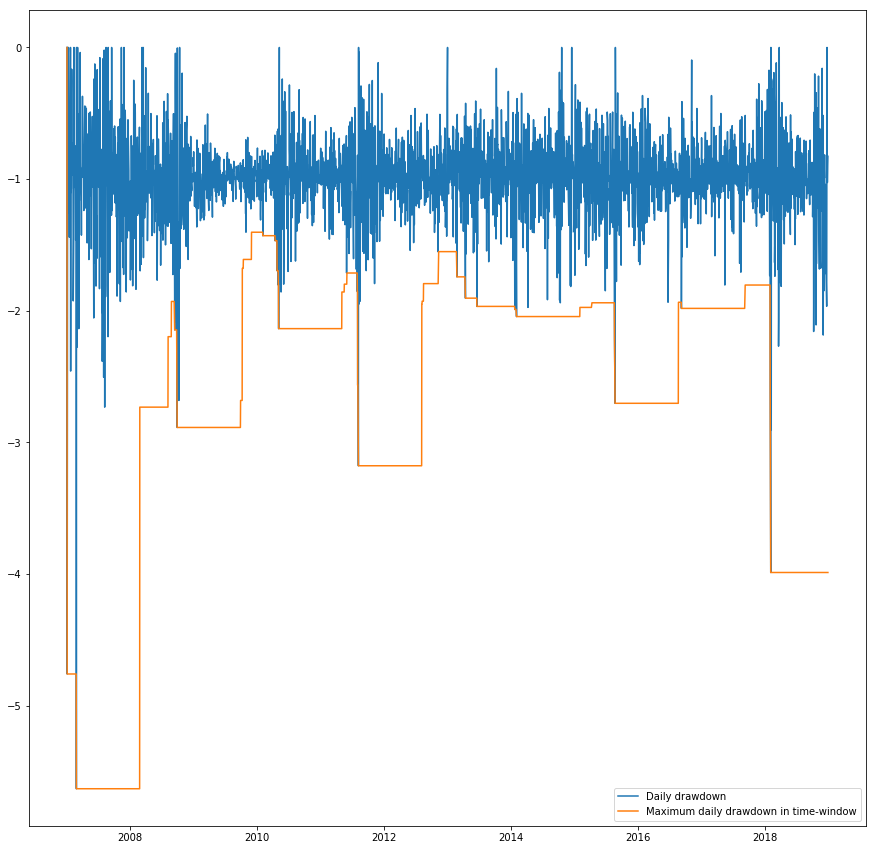

In [21]:
# Calculate the max value 
roll_max = returns.rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = returns/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

# Plot the results
plt.figure(figsize=(15,15))
plt.plot(returns.index, daily_draw_down, label='Daily drawdown')
plt.plot(returns.index, max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()

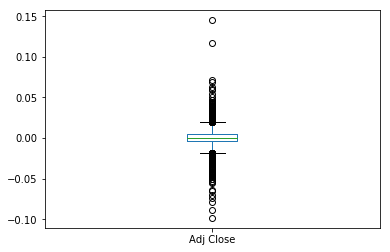

In [22]:
# Box plot
returns.plot(kind='box')

In [23]:
print("Stock returns: ")
print(returns.mean())
print('-' * 50)
print("Stock risk:")
print(returns.std())

Stock returns: 
0.0003476488888124157
--------------------------------------------------
Stock risk:
0.012442271708875538


In [24]:
rf = 0.001
Sharpe_Ratio = ((returns.mean() - rf) / returns.std()) * np.sqrt(252)
print('Sharpe Ratio: ', Sharpe_Ratio)

Sharpe Ratio:  -0.8323040268287034


### Value-at-Risk 99% Confidence

In [25]:
# 99% confidence interval
# 0.01 empirical quantile of daily returns
var99 = round((returns).quantile(0.01), 3)

In [26]:
print('Value at Risk (99% confidence)')
print(var99)

Value at Risk (99% confidence)
-0.037


In [27]:
# the percent value of the 5th quantile
print('Percent Value-at-Risk of the 5th quantile')
var_1_perc = round(np.quantile(var99, 0.01), 3)
print("{:.1f}%".format(-var_1_perc*100))

Percent Value-at-Risk of the 5th quantile
3.7%


In [28]:
print('Value-at-Risk of 99% for 100,000 investment')
print("${}".format(int(-var99 * 100000)))

Value-at-Risk of 99% for 100,000 investment
$3700


### Value-at-Risk 95% Confidence

In [29]:
# 95% confidence interval
# 0.05 empirical quantile of daily returns
var95 = round((returns).quantile(0.05), 3)

In [30]:
print('Value at Risk (95% confidence)')
print(var95)

Value at Risk (95% confidence)
-0.019


In [31]:
print('Percent Value-at-Risk of the 5th quantile')
print("{:.1f}%".format(-var95*100))

Percent Value-at-Risk of the 5th quantile
1.9%


In [32]:
# VaR for 100,000 investment
print('Value-at-Risk of 99% for 100,000 investment')
var_100k = "${}".format(int(-var95 * 100000))
print("${}".format(int(-var95 * 100000)))

Value-at-Risk of 99% for 100,000 investment
$1900


In [33]:
mean = np.mean(returns)
std_dev = np.std(returns)

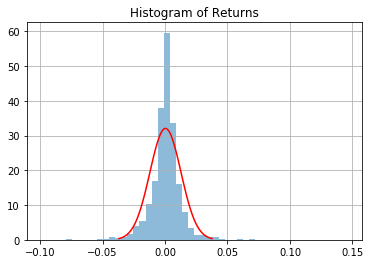

In [34]:
returns.hist(bins=50, normed=True, histtype='stepfilled', alpha=0.5)
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
plt.plot(x, mlab.normpdf(x, mean, std_dev), "r")
plt.title('Histogram of Returns')
plt.show()

In [35]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

In [36]:
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0155951
95%                      -0.0201147
99%                      -0.0285926
